<a href="https://colab.research.google.com/github/abhishekshah5486/classic-machine-learning/blob/main/scaler_linear_regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations

In [161]:
def predict(self, X):
  return np.dot(X, self.W) + self.b

LinearRegression.predict = predict

In [162]:
def r2_score(self, X, y) :
  y_ = self.predict(X)
  ss_residual = np.sum(np.square(y - y_))
  ss_total = np.sum((y - y.mean())**2)
  r2_score = 1 - (ss_residual/ss_total)
  self.r2_score = r2_score
  return self.r2_score

LinearRegression.r2_score = r2_score

In [163]:
def update_weights(self):
  y_pred = self.predict(self.X)
  dW = (-2*(self.X.T).dot(self.y - y_pred))/self.m
  db = (-2*np.sum(self.y - y_pred))/self.m
  self.W = self.W - self.learning_rate*dW
  self.b = self.b = self.learning_rate*db
  return self

LinearRegression.update_weights = update_weights

In [164]:
def fit(self, X, y):
  self.m = X.shape[0]
  self.n = X.shape[1]
  self.W = np.ones(self.n)
  self.b = 0
  self.X = X
  self.y = y
  self.loss_list = []
  iterations = self.iterations
  for i in range(iterations):
    self.update_weights()
    y_ = self.predict(self.X)
    loss = np.sum((self.y - y_)**2)/self.m
    self.loss_list.append(loss)

  return self

LinearRegression.fit = fit

In [165]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 41.2MB/s]


In [166]:
df = pd.read_csv('cars24-car-price-clean.csv')

In [167]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [168]:
from sklearn.model_selection import train_test_split

In [169]:
y = df['selling_price']
X = df.drop(columns=['selling_price'], axis=1)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [171]:
lr = LinearRegression(iterations=100)

In [172]:
X_train.shape

(15856, 17)

In [173]:
W = np.ones(X_train.shape[1])
W.shape

(17,)

In [174]:
lr.fit(X_train, y_train)

In [175]:
lr.r2_score(X_test, y_test)

0.4882399363139591

In [176]:
lr.predict(X_test)

array([ 1.73628426, -0.49343172,  0.00932849, ..., -0.55645586,
        0.28942135, -0.83441725])

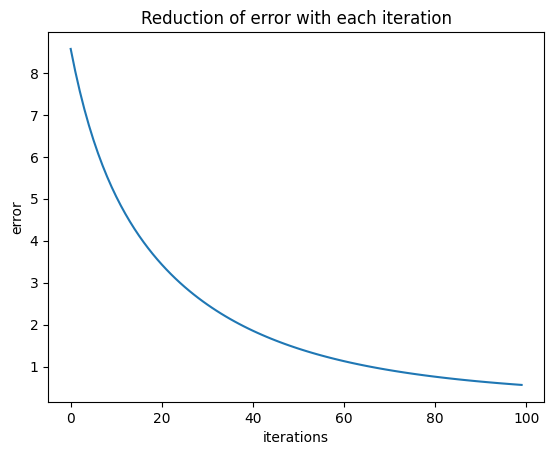

In [177]:
plt.plot(lr.loss_list)
plt.title("Reduction of error with each iteration")
plt.xlabel('iterations')
plt.ylabel('error')
plt.show()